PROBLEM STATEMENT: A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. 

So, here we have to pre- process data first and then find those variables( those columns in the dataset) which actually influence the most of the accuracy in the final prediction...

Ultimately, after pre processing data, we have to train the datasets with some models and find the most accurate prediction

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('train.csv')
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

In [4]:
bank.columns


Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
bank_client = bank.iloc[: , 1:8]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,56,services,married,high.school,no,no,yes
4,45,services,married,basic.9y,unknown,no,no


In [6]:
print('Marital:\n', bank_client['marital'].unique())
print('\nEducation:\n', bank_client['education'].unique())
print('\nDefault:\n', bank_client['default'].unique())
print('\nHousing:\n', bank_client['housing'].unique())
print('\nJob:\n', bank_client['job'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']

Education:
 ['basic.4y' 'high.school' 'basic.9y' 'unknown' 'professional.course'
 'basic.6y' 'university.degree' 'illiterate']

Default:
 ['no' 'unknown' 'yes']

Housing:
 ['no' 'yes' 'unknown']

Job:
 ['housemaid' 'services' 'blue-collar' 'technician' 'retired' 'management'
 'self-employed' 'admin.' 'unknown' 'entrepreneur' 'unemployed' 'student']


In [7]:
#Trying to crosscheck selected data with 'age' column
#Checking if there are any null values or any garbage values
print(bank_client['age'].isnull().any())

False


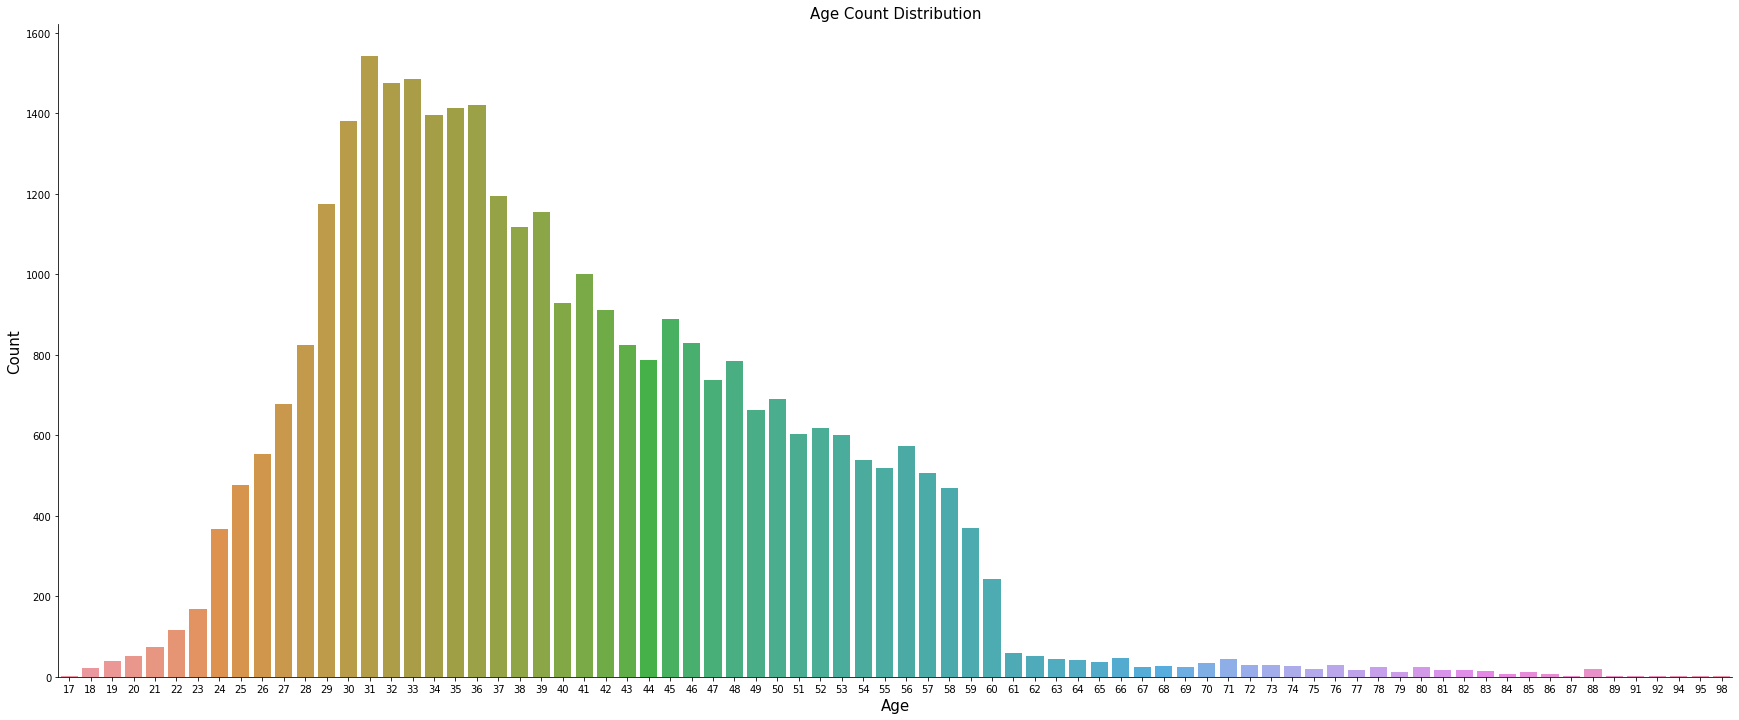

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [9]:
print('1 deg Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5 x InterQuartileRange = Q1 - 1.5 * IQR 
  # Upper 1.5 x InterQuartileRange = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1 deg Quartile:  32.0
2 deg Quartile:  38.0
3 deg Quartile:  47.0
4 deg Quartile:  98.0
Ages above:  69.5 are outliers


In [10]:
print('Number of outliers (above the age of 69.6): ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Total Number of clients: ', len(bank_client))
#Outliers in %
print('Outlier Perecentage:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Number of outliers (above the age of 69.6):  391
Total Number of clients:  32978
Outlier Perecentage: 1.19 %


In [11]:
# Calculating some values to evaluate age
print('MEAN:', round(bank_client['age'].mean(), 1))

print('STD :', round(bank_client['age'].std(), 1))

# To get an idea about dispersion, we'll make use of Coeff Variation 
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), )

MEAN: 40.0
STD : 10.5
CV  : 26.1


Since the coefficient of variation is on the higher side, we will not be able to get an accurate result from it. So, we can conclude that age as an independent variable is not giving us much info or accuracy. 

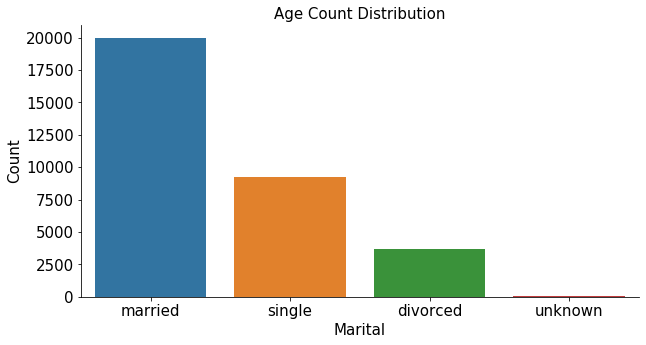

In [12]:
#Let's see what kind of 'marital clients' this bank has....
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

 if you cross marital with default, loan or housing, there is no such explicit relation

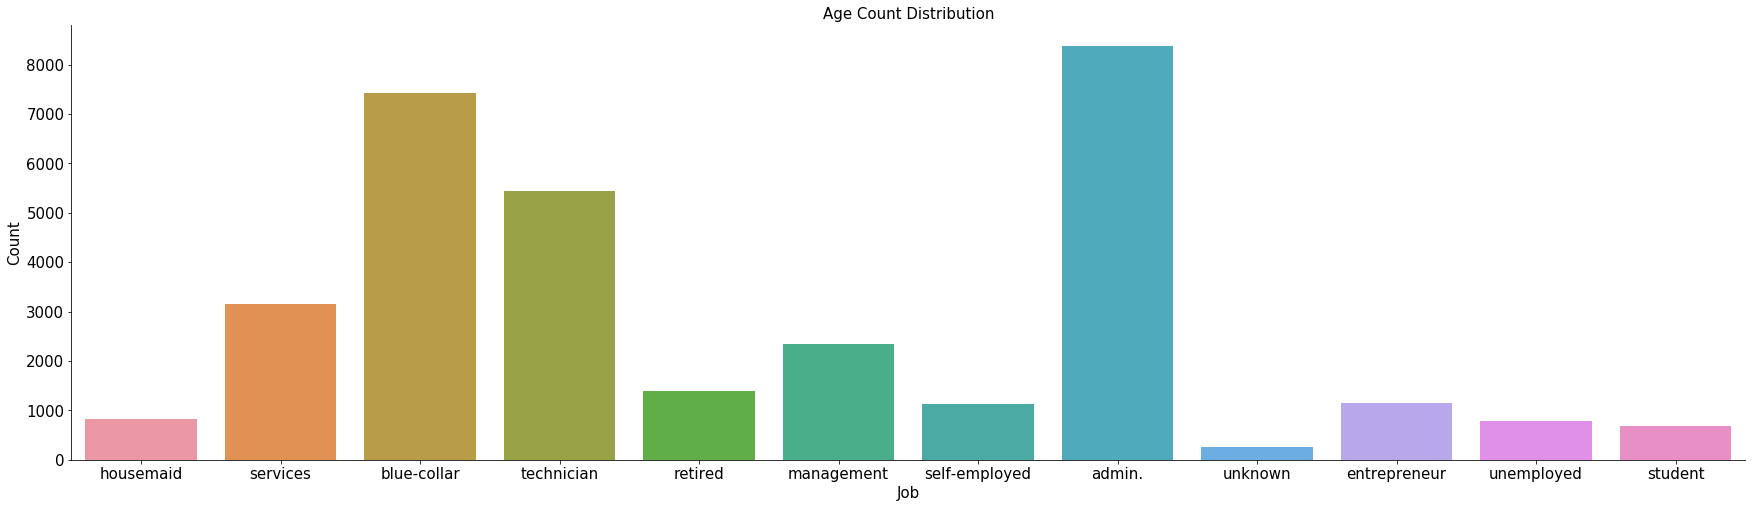

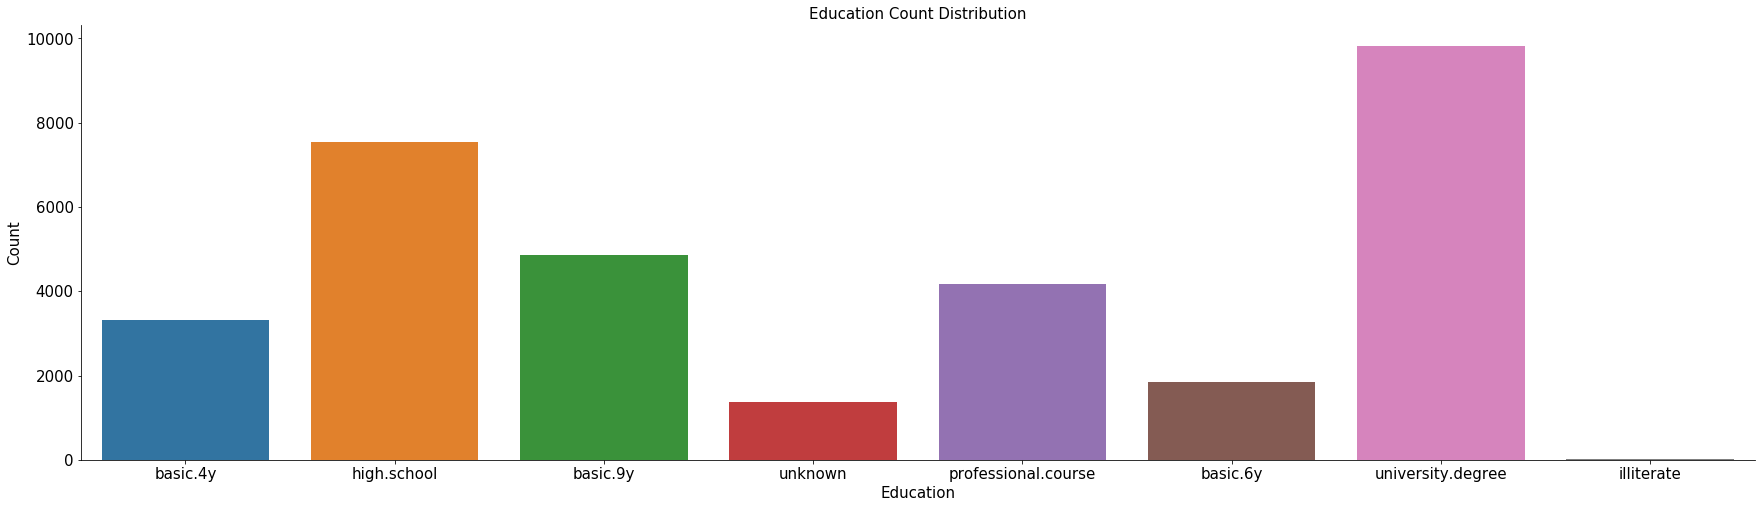

In [13]:

fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


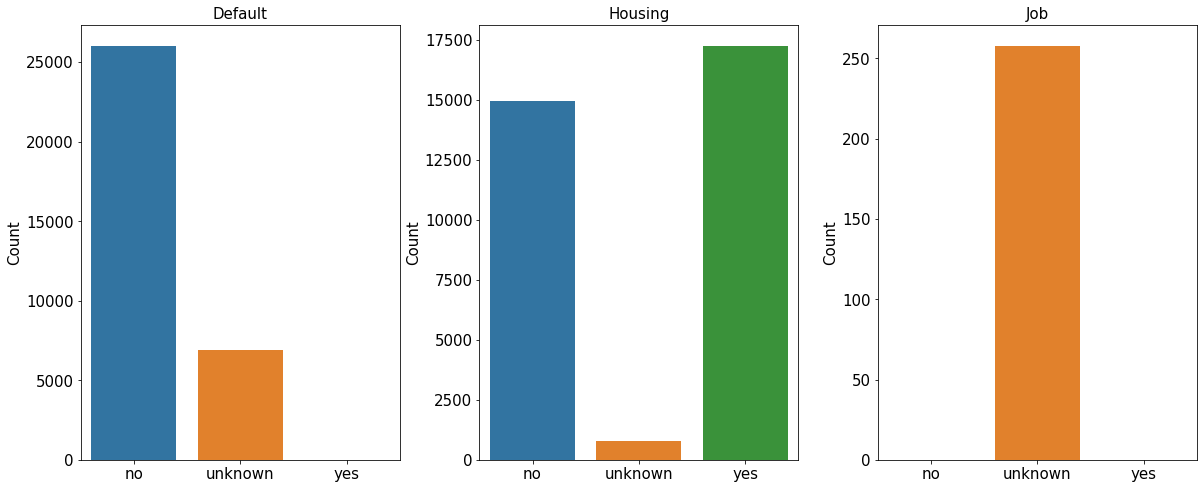

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'job', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Job', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [15]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

print('\nHousing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

print('\nHousing:\n No to personal loan:'     , bank_client[bank_client['job'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['job'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['job'] == 'yes']    ['age'].count())


Default:
 No credit in default: 26043 
 Unknown credit in default: 6932 
 Yes to credit in default: 3

Housing:
 No housing in loan: 14937 
 Unknown housing in loan: 789 
 Yes to housing in loan: 17252

Housing:
 No to personal loan: 0 
 Unknown to personal loan: 258 
 Yes to personal loan: 0


1. Default, loan, housing- just to get an idea about the distribution
2. Jobs, marital, education- not giving us a conclusive evidence
3. Age- very high dispersion, so inaccuracy is also high


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['job']     = labelencoder_X.fit_transform(bank_client['job'])

In [17]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

bank_client = pd.get_dummies(data = bank_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [18]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,no
1,3,7,1,3,1,0,no
2,2,7,1,3,0,2,no
3,3,7,1,3,0,0,yes
4,2,7,1,2,1,0,no


In [19]:
# Dividing the dataframe into smaller chunks to make analysis easier
bank_related = bank.iloc[: , 8:12]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,307
4,telephone,may,mon,198


In [20]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [21]:
print("Contact? : \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Contact? : 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


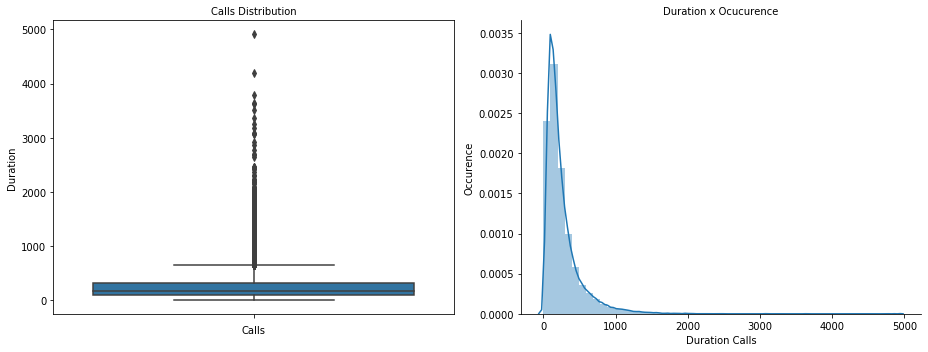

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [23]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [24]:
print('1 deg Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1 deg Quartile:  103.0
2 deg Quartile:  180.0
3 deg Quartile:  320.0
4 deg Quartile:  4918.0
Duration calls above:  645.5 are outliers


In [25]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2405
Number of clients:  32978
Outliers are: 7.29 %


In [26]:
bank[(bank['duration'] == 0)]

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4967,6251,39,admin.,married,high.school,no,yes,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
18413,23031,59,management,married,university.degree,no,yes,no,cellular,aug,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
22455,28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
26435,33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


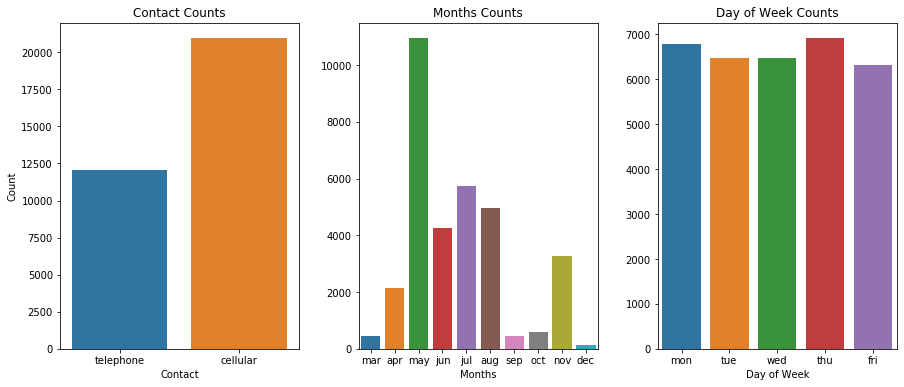

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [28]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  645.5 are outliers


In [29]:
bank_related[bank_related['duration'] > 640].count()

contact        2446
month          2446
day_of_week    2446
duration       2446
dtype: int64

In [30]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [31]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,307
4,1,6,1,198


In [32]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [33]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,3
4,1,6,1,3


In [34]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()



,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [35]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [36]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [37]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)


MODEL


In [38]:
bank_client=bank.iloc[: , 1:8]

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [39]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(32978, 20)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.0012313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [41]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
32317,2,9,1,6,0,2,0,0,1,4,4,-1.7,94.027,-38.3,0.900,4991.6,1,999,0,1
24241,3,9,1,6,0,2,0,0,0,2,4,-1.8,93.075,-47.1,1.365,5099.1,2,999,1,2
3429,2,7,1,3,1,2,0,1,6,3,2,1.1,93.994,-36.4,4.856,5191.0,1,999,0,1
25599,2,7,1,3,1,0,0,1,6,2,1,-1.8,92.893,-46.2,1.327,5099.1,2,999,0,1
19742,3,4,1,6,0,0,0,1,7,1,1,-0.1,93.200,-42.0,4.191,5195.8,3,999,0,1


In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[36  2]
 [ 1  2]]
93.0


k=1 87.79 (+/- 0.59)
k=2 89.47 (+/- 0.52)
k=3 89.28 (+/- 0.48)
k=4 89.65 (+/- 0.50)
k=5 89.71 (+/- 0.34)
k=6 89.83 (+/- 0.57)
k=7 89.84 (+/- 0.45)
k=8 89.97 (+/- 0.42)
k=9 89.92 (+/- 0.43)
k=10 90.02 (+/- 0.49)
k=11 90.05 (+/- 0.42)
k=12 90.17 (+/- 0.42)
k=13 90.16 (+/- 0.49)
k=14 90.02 (+/- 0.33)
k=15 90.04 (+/- 0.42)
k=16 90.07 (+/- 0.37)
k=17 90.09 (+/- 0.38)
k=18 90.03 (+/- 0.37)
k=19 90.10 (+/- 0.39)
k=20 90.07 (+/- 0.45)
k=21 90.11 (+/- 0.37)
k=22 90.07 (+/- 0.33)
k=23 90.14 (+/- 0.38)
k=24 90.08 (+/- 0.48)
k=25 90.13 (+/- 0.45)
The optimal number of neighbors is 11 with 90.2%


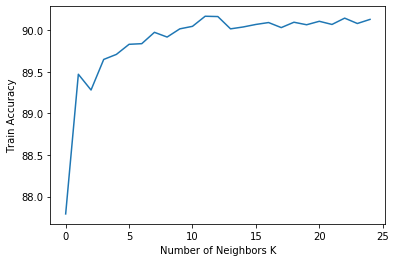

In [44]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[37  1]
 [ 2  1]]
93.0


In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[31  7]
 [ 1  2]]
80.0


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[35  3]
 [ 1  2]]
90.0


In [48]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[31  7]
 [ 0  3]]
83.0


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[35  3]
 [ 1  2]]
90.0


In [50]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)


,Models,Score
5,Gradient Boosting,0.912682
0,Random Forest Classifier,0.907763
3,Logistic Model,0.906853
2,K-Near Neighbors,0.901600
1,Decision Tree Classifier,0.883080
4,Gausian NB,0.844309


In [51]:


#Gradient
from sklearn import metrics
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

<Figure size 432x288 with 0 Axes>

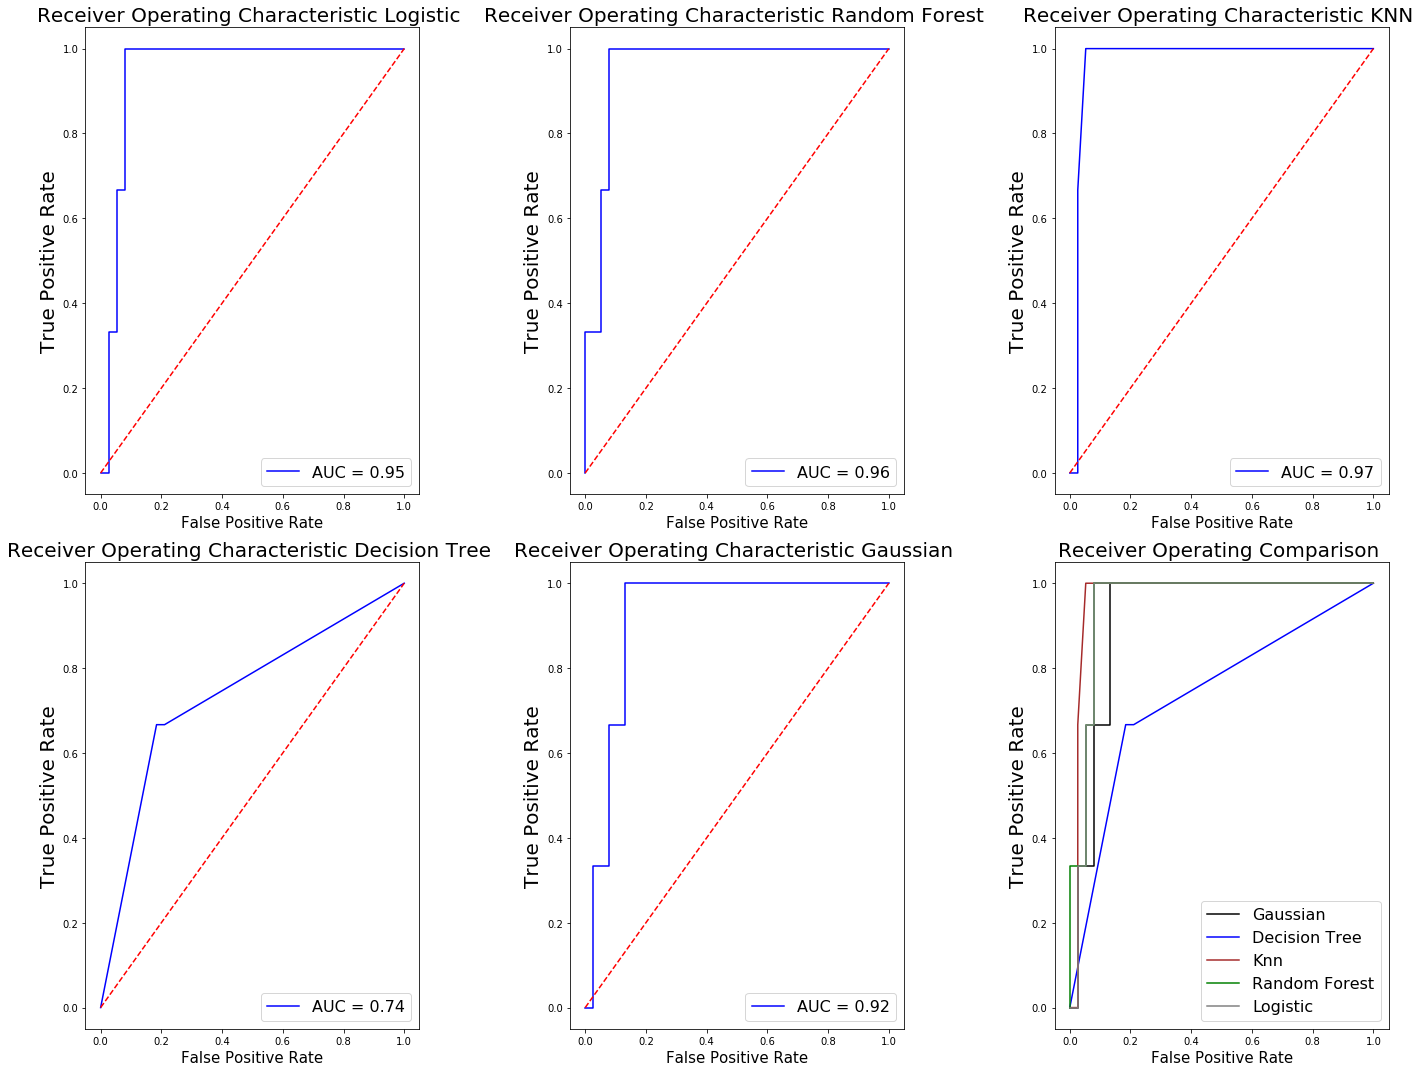

In [52]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [53]:
from sklearn.metrics import classification_report

In [54]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))


KNN Confusion Matrix
 [[37  1]
 [ 2  1]]


In [55]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.50      0.33      0.40         3

    accuracy                           0.93        41
   macro avg       0.72      0.65      0.68        41
weighted avg       0.92      0.93      0.92        41



In [56]:
print(round(7163 /(7163 + 116),2))


0.98


In [57]:
print(round(253 / (253 + 706  ),2))
print(round(metrics.recall_score(y_test, knnpred),2))

0.26
0.33


In [58]:
print(round(7163 / (7163 + 706),2))


0.91


In [59]:
print(round(253 / (253 + 116),2))
print(round(metrics.precision_score(y_test, knnpred),2))

0.69
0.5


In [60]:
F1_0 = 2*0.91*0.98/(0.91+0.98)
round(F1_0,2)

0.94

In [61]:
F1_1 = 2*0.69*0.26/(0.69+0.26)
round(F1_1,2)

0.38

In [62]:
AVG_precision =  (0.91*(7279/8238))+ (0.69*(959/8238))
round(AVG_precision,2)

0.88

In [63]:
AVG_Recall =  (0.98*(7279/8238))+ (0.26*(959/8238))
round(AVG_Recall,2)


0.9

In [64]:
AVG_f1 =  (0.95*(7279/8238))+ (0.38*(959/8238))
round(AVG_f1,2)

0.88

In [65]:
test = pd.read_csv('test.csv')
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
test.head()


,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 21 columns):
id                8210 non-null int64
age               8210 non-null int64
job               8210 non-null object
marital           8210 non-null object
education         8210 non-null object
default           8210 non-null object
housing           8210 non-null object
loan              8210 non-null object
contact           8210 non-null object
month             8210 non-null object
day_of_week       8210 non-null object
duration          8210 non-null int64
campaign          8210 non-null int64
pdays             8210 non-null int64
previous          8210 non-null int64
poutcome          8210 non-null object
emp.var.rate      8210 non-null float64
cons.price.idx    8210 non-null float64
cons.conf.idx     8210 non-null float64
euribor3m         8210 non-null float64
nr.employed       8210 non-null float64
dtypes: float64(5), int64(6), object(10)
memory usage: 1.3+ MB


In [67]:
test.columns


Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [68]:
bank_client = test.iloc[: , 1:8]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,40,admin.,married,basic.6y,no,no,no
1,59,admin.,married,professional.course,no,no,no
2,41,blue-collar,married,unknown,unknown,no,no
3,25,services,single,high.school,no,yes,no
4,57,housemaid,divorced,basic.4y,no,yes,no


In [69]:
print('Marital:\n', bank_client['marital'].unique())
print('\nEducation:\n', bank_client['education'].unique())
print('\nDefault:\n', bank_client['default'].unique())
print('\nHousing:\n', bank_client['housing'].unique())
print('\nJob:\n', bank_client['job'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']

Education:
 ['basic.6y' 'professional.course' 'unknown' 'high.school' 'basic.4y'
 'university.degree' 'basic.9y' 'illiterate']

Default:
 ['no' 'unknown']

Housing:
 ['no' 'yes' 'unknown']

Job:
 ['admin.' 'blue-collar' 'services' 'housemaid' 'unemployed' 'technician'
 'unknown' 'management' 'entrepreneur' 'self-employed' 'retired' 'student']


In [70]:
#Trying to crosscheck selected data with 'age' column
#Checking if there are any null values or any garbage values
print(bank_client['age'].isnull().any())

False


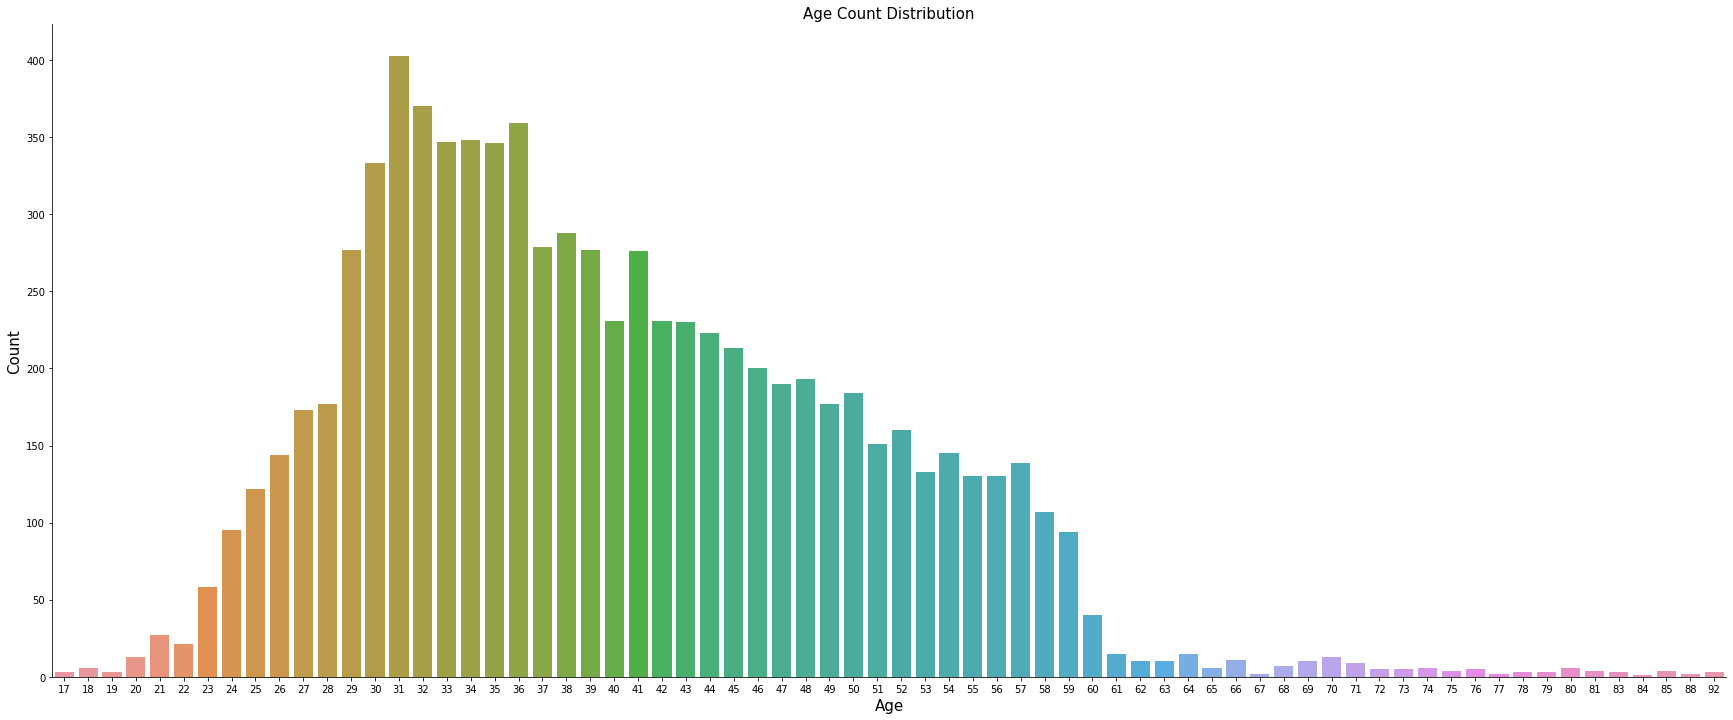

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [72]:
print('1 deg Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5 x InterQuartileRange = Q1 - 1.5 * IQR 
  # Upper 1.5 x InterQuartileRange = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1 deg Quartile:  32.0
2 deg Quartile:  38.0
3 deg Quartile:  47.0
4 deg Quartile:  92.0
Ages above:  69.5 are outliers


In [73]:
print('Number of outliers (above the age of 69.6): ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Total Number of clients: ', len(bank_client))
#Outliers in %
print('Outlier Perecentage:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Number of outliers (above the age of 69.6):  78
Total Number of clients:  8210
Outlier Perecentage: 0.95 %


In [74]:
# Calculating some values to evaluate age
print('MEAN:', round(bank_client['age'].mean(), 1))

print('STD :', round(bank_client['age'].std(), 1))

# To get an idea about dispersion, we'll make use of Coeff Variation 
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), )

MEAN: 40.0
STD : 10.2
CV  : 25.6


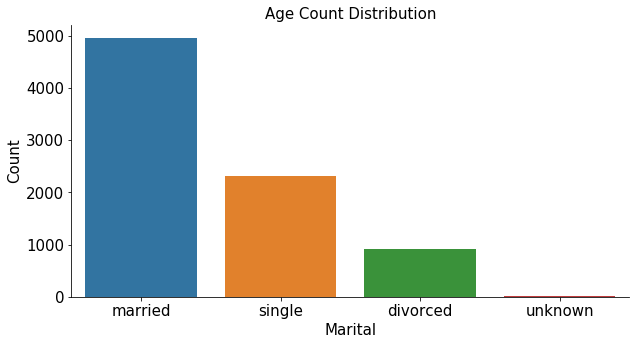

In [75]:
#Let's see what kind of 'marital clients' this bank has....
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

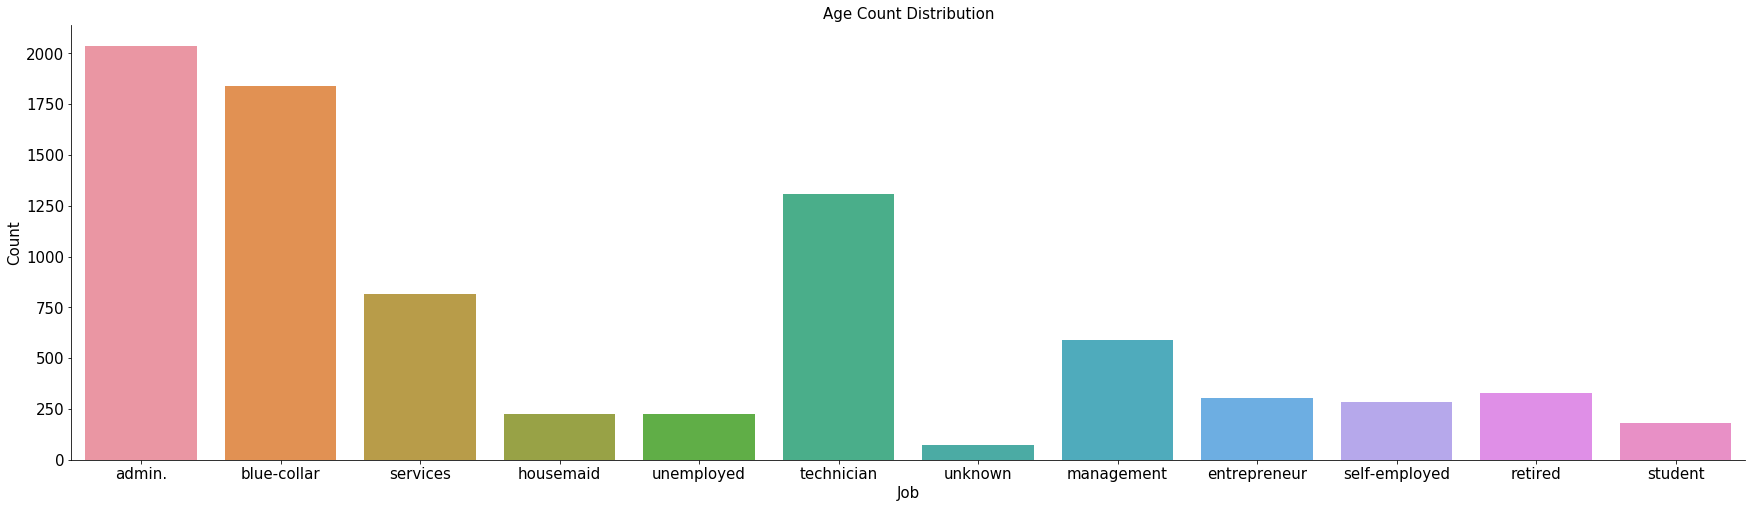

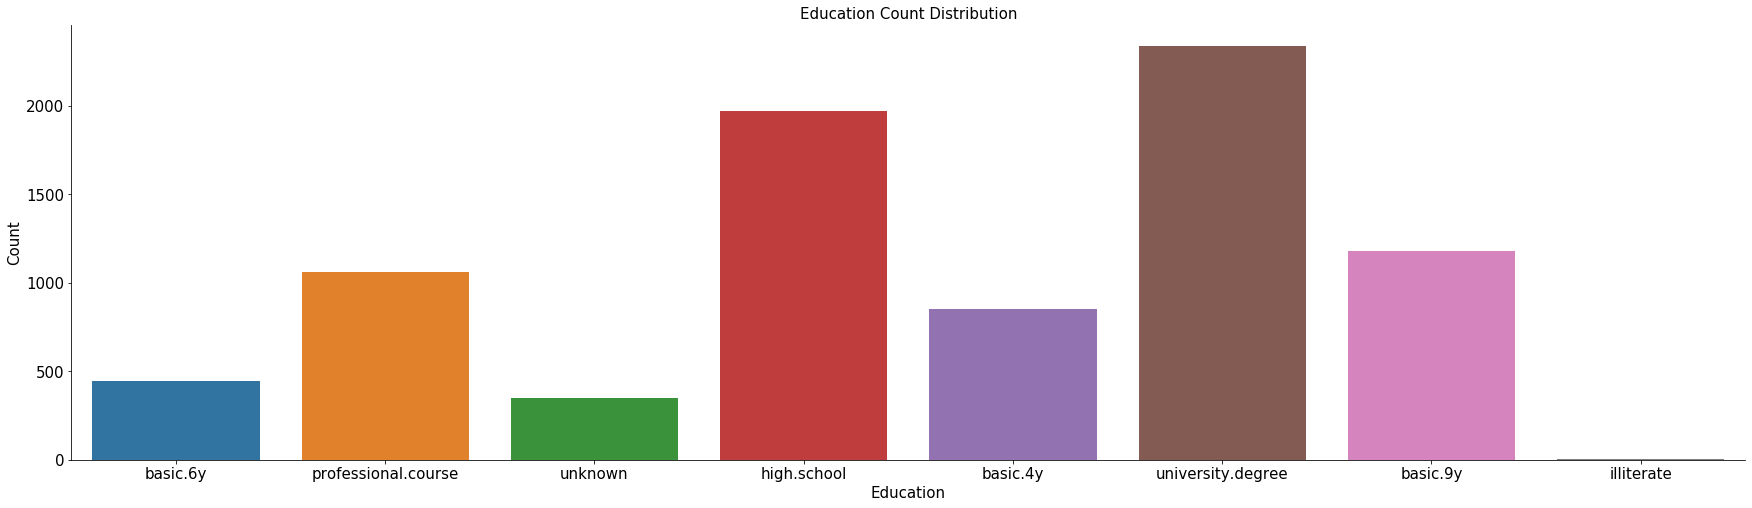

In [76]:

fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


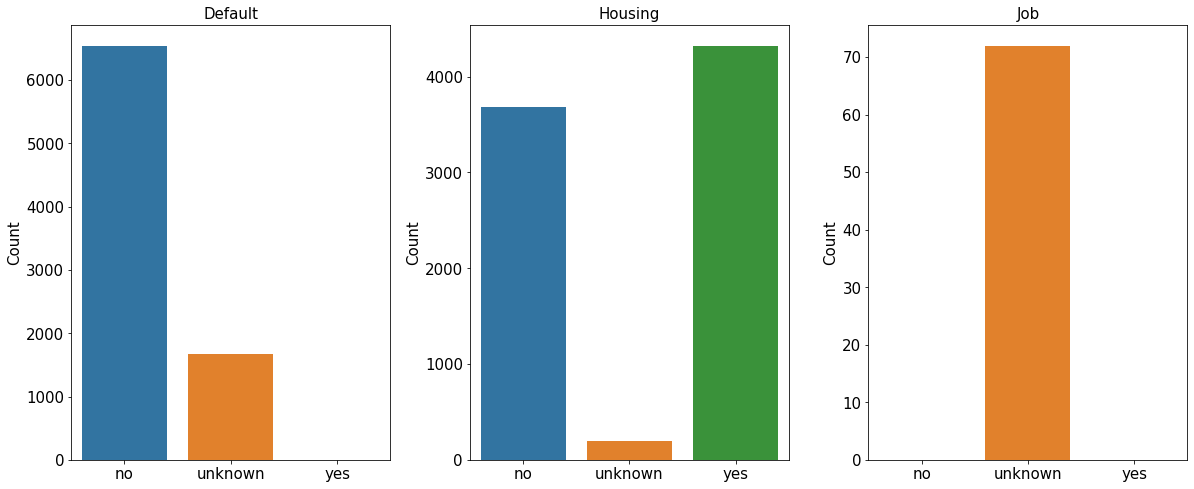

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'job', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Job', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [78]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

print('\nHousing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

print('\nHousing:\n No to personal loan:'     , bank_client[bank_client['job'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['job'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['job'] == 'yes']    ['age'].count())


Default:
 No credit in default: 6545 
 Unknown credit in default: 1665 
 Yes to credit in default: 0

Housing:
 No housing in loan: 3685 
 Unknown housing in loan: 201 
 Yes to housing in loan: 4324

Housing:
 No to personal loan: 0 
 Unknown to personal loan: 72 
 Yes to personal loan: 0


In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['job']     = labelencoder_X.fit_transform(bank_client['job'])

In [80]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [81]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,2,0,1,1,0,0,no
1,3,0,1,5,0,0,no
2,2,1,1,7,1,0,no
3,1,7,2,3,0,2,no
4,3,3,0,0,0,2,no


In [82]:
# Dividing the dataframe into smaller chunks to make analysis easier
bank_related = test.iloc[: , 8:12]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,151
1,telephone,may,mon,139
2,telephone,may,mon,55
3,telephone,may,mon,222
4,telephone,may,mon,293


In [83]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [84]:
print("Contact? : \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Contact? : 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


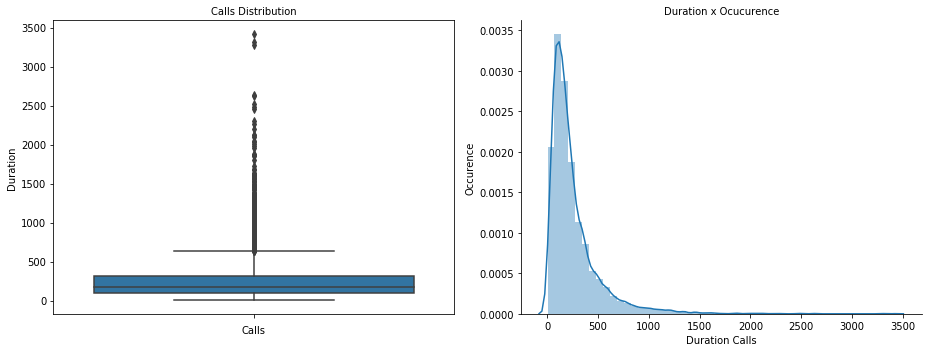

In [85]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [86]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

Max duration  call in minutes:   57.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [87]:
print('1 deg Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2 deg Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3 deg Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4 deg Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1 deg Quartile:  102.0
2 deg Quartile:  179.0
3 deg Quartile:  317.0
4 deg Quartile:  3422.0
Duration calls above:  639.5 are outliers


In [88]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  558
Number of clients:  8210
Outliers are: 6.8 %


In [89]:
test[(test['duration'] == 0)]

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed


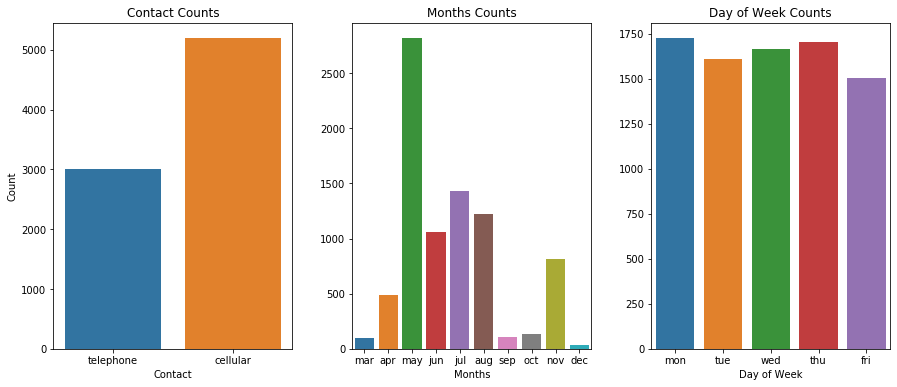

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [91]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  639.5 are outliers


In [92]:
bank_related[bank_related['duration'] > 640].count()

contact        562
month          562
day_of_week    562
duration       562
dtype: int64

In [93]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [94]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,151
1,1,6,1,139
2,1,6,1,55
3,1,6,1,222
4,1,6,1,293


In [95]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [96]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,2
1,1,6,1,2
2,1,6,1,1
3,1,6,1,3
4,1,6,1,3


In [97]:
bank_se = test.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()



,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [98]:
bank_o = test.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [99]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [100]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [101]:
bank_client=test.iloc[: , 1:8]

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [102]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(8210, 20)

In [103]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix, accuracy_score
# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [104]:
gbk_test_data = gbk.predict(bank_final)

In [105]:
gbk_test_data

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [106]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,2,0,1,1,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,0,1,5,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,1,1,7,1,0,0,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,1,7,2,3,0,2,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,3,0,0,0,2,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


In [107]:
test2 = pd.read_csv('test.csv')

In [108]:
test2.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [109]:
test2['y'] = gbk_test_data.tolist()


In [110]:
# test2 = pd.DataFrame(gbk_test_data), columns=list('y')

In [111]:
test2.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [112]:
np.unique(gbk_test_data)

array([0, 1], dtype=uint8)

In [113]:
test810= test2

In [114]:
test810.drop(['age'],axis=1)

,id,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
1,6,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,10,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,11,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,13,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
5,16,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
6,20,unemployed,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
7,21,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
8,24,admin.,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
9,28,technician,single,university.degree,unknown,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [115]:
test810.drop(['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',],axis=1)

,id,age,y
0,3,40,1
1,6,59,1
2,10,41,1
3,11,25,1
4,13,57,1
5,16,35,1
6,20,30,1
7,21,55,1
8,24,37,1
9,28,54,1


In [116]:
test810.drop(['age'], axis =1)

,id,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
1,6,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,10,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,11,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,13,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
5,16,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
6,20,unemployed,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
7,21,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
8,24,admin.,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
9,28,technician,single,university.degree,unknown,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [117]:
testfinal=test810.drop(['age','job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',],axis=1)

In [118]:
testfinal.head()

,id,y
0,3,1
1,6,1
2,10,1
3,11,1
4,13,1


In [119]:
testfinal.to_csv(index=False)

'id,y\r\n3,1\r\n6,1\r\n10,1\r\n11,1\r\n13,1\r\n16,1\r\n20,1\r\n21,1\r\n24,1\r\n28,1\r\n29,1\r\n43,1\r\n47,1\r\n49,1\r\n61,1\r\n62,1\r\n68,1\r\n73,1\r\n75,1\r\n78,1\r\n80,1\r\n85,1\r\n87,1\r\n88,1\r\n91,1\r\n93,1\r\n94,1\r\n101,1\r\n113,1\r\n116,1\r\n131,1\r\n132,1\r\n133,1\r\n136,1\r\n139,1\r\n142,1\r\n143,1\r\n144,1\r\n149,1\r\n157,1\r\n159,1\r\n161,1\r\n163,1\r\n165,1\r\n167,1\r\n170,1\r\n178,1\r\n184,1\r\n189,1\r\n192,1\r\n201,1\r\n208,1\r\n221,1\r\n222,1\r\n224,1\r\n226,1\r\n238,1\r\n254,1\r\n255,1\r\n264,1\r\n265,1\r\n270,1\r\n271,1\r\n275,1\r\n278,1\r\n287,1\r\n289,1\r\n291,1\r\n292,1\r\n295,1\r\n296,1\r\n297,1\r\n307,1\r\n309,1\r\n311,1\r\n328,1\r\n330,1\r\n334,1\r\n335,1\r\n336,1\r\n345,1\r\n350,1\r\n365,1\r\n381,1\r\n385,1\r\n389,1\r\n394,1\r\n395,1\r\n405,1\r\n413,1\r\n414,1\r\n425,1\r\n427,1\r\n428,1\r\n435,1\r\n440,1\r\n442,1\r\n446,1\r\n447,1\r\n449,1\r\n460,1\r\n463,1\r\n468,1\r\n469,1\r\n483,1\r\n484,1\r\n491,1\r\n494,1\r\n501,1\r\n503,1\r\n504,1\r\n510,1\r\n515,1\r\n525

In [120]:
#df.to_csv(r'C:\Users\Admin\Desktop\file3.csv', index=False)
#df['label'] = df.label.map({'ham':0, 'spam':1})
testfinal['y']= testfinal['y'].map({1:'yes', 0:'no'})
testfinal.to_csv('C:\\Users\\Ankit Choraria\\Desktop\\python3\\final1.csv', index= False)

In [121]:
testfinal.head()

,id,y
0,3,yes
1,6,yes
2,10,yes
3,11,yes
4,13,yes


In [122]:
testfinal810=testfinal

In [123]:
testfinal810.head()

,id,y
0,3,yes
1,6,yes
2,10,yes
3,11,yes
4,13,yes


In [124]:
testing333=test2

In [125]:
testing333['y']=testing333['y'].map({1:'no',0:'yes'})

In [126]:
testing333.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [128]:
testfinal123=testing333.drop(['age','job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',],axis=1)

In [129]:
testfinal123.to_csv('C:\\Users\\Ankit Choraria\\Desktop\\python3\\testingfinal.csv', index= False)

In [130]:
test101= test2

In [131]:
test101['y']=test101['y'].map({1:'no',0:'yes'})

In [132]:
test101.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN


In [133]:
test2.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NaN


In [134]:
finaltest=pd.read_csv('test.csv')

In [135]:
finaltest.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [136]:
finaltest['y'] = gbk_test_data.tolist()


In [137]:
finaltest.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [138]:
final810= finaltest